### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#scikit learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import pickle
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Global Variables

In [3]:
# Create Global Variables If Necessay
projectName = 'HRAnalytics'
datasetPath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HRAnalytics/Data/'
modelSavePath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HRAnalytics/'

### Custom Functions

In [4]:
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Preprocessing

In [29]:
df = pd.read_csv(datasetPath + 'TRAIN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [30]:
# CHECK FOR NAN VALUE IN THE DATA FRAME
for col in list(df.columns):
    # Display Columns With Null Values 
    if df[col].isnull().sum() > 0:
        print(("%s : %d")%(col, df[col].isnull().sum()))
        if df[col].dtype == 'object':
            df[col].fillna('NA', inplace = True)
        if df[col].dtype == 'int64':
            df[col].fillna(0, inplace = True)
        if df[col].dtype == 'float64':
            df[col].fillna(0.0, inplace = True)
        
df.info()

education : 2409
previous_year_rating : 4124
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [31]:
# Get The Number Of Unique Values From Each Column and Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
for col in ['department', 'region', 'education', 'gender', 'recruitment_channel', 'previous_year_rating']:
    df[col] = labelencoder_df.fit_transform(df[col])

### Feature Selection Using Pearson Correlation

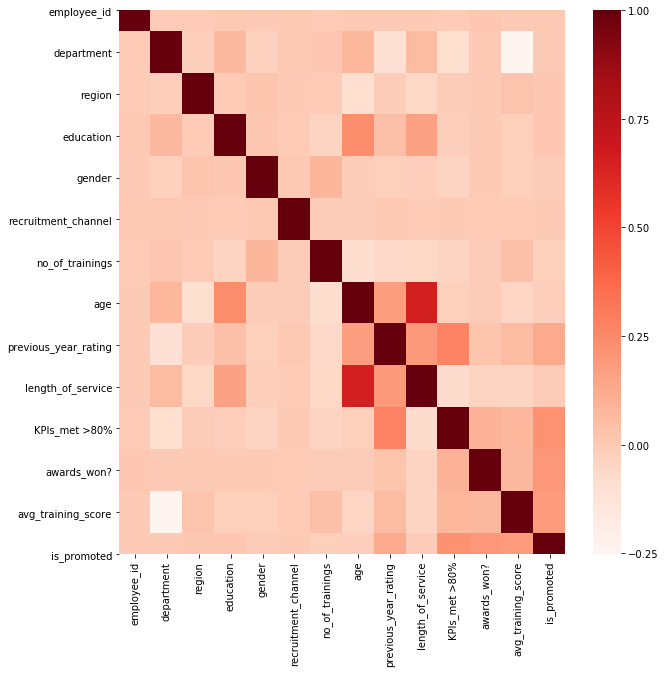

In [32]:
# Compute Pearson Correlation
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor['is_promoted'])

# Plot Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [33]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
print(relevant_features)

employee_id             0.001206
department              0.000130
region                  0.008841
education               0.009608
gender                  0.011109
recruitment_channel     0.002229
no_of_trainings         0.024896
age                     0.017166
previous_year_rating    0.125991
length_of_service       0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64


### Create Testing and Training Data

In [34]:
#SEPERATE LABEL COLUMN FROM FEATURE COLUMNS
df_label = df['is_promoted'].values
df.drop(['is_promoted'], axis=1, inplace=True)
df_feature = df.values

#SPLIT TRAINING SET AND TESTING SET
from sklearn.model_selection._split import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(df_feature, df_label, test_size=0.20, random_state=39)

### Data Modeling

In [35]:
#DECISION TREE
model_DT = DecisionTreeClassifier()
model_DT.fit(feature_train,label_train)
predicted_values_DT = model_DT.predict(feature_test)

#RANDOM FOREST CLASSIFIER
model_RF = RandomForestClassifier(random_state=39, n_estimators=100)
model_RF.fit(feature_train,label_train)
predicted_values_RF = model_RF.predict(feature_test)

#GRADIENT BOOSTING ALGORITHM
model_GB= GradientBoostingClassifier(n_estimators=50, random_state=39)
model_GB.fit(feature_train, label_train)
predicted_values_GBA = model_GB.predict(feature_test)

### Meassure Accuracy

In [36]:
accuracy = dict()
accuracy['DecisionTree'] = accuracy_score(predicted_values_DT,label_test)*100
accuracy['RandomForest'] = accuracy_score(predicted_values_RF,label_test)*100
accuracy['GBA'] = accuracy_score(predicted_values_GBA,label_test)*100
#accuracy['Max_accuracy'] = 100
accuracy=pd.DataFrame(list(accuracy.items()),columns=['Algorithm','Accuracy'])
print(accuracy)

      Algorithm   Accuracy
0  DecisionTree  89.709907
1  RandomForest  93.285897
2           GBA  92.875388


### Plot Accuracy

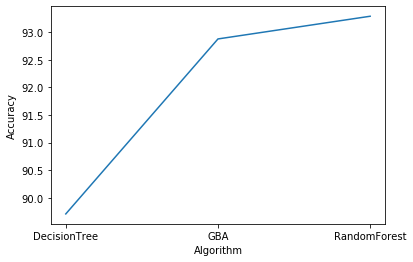

In [37]:
sns.lineplot(x='Algorithm',y='Accuracy',data=accuracy)

### Save Model

In [38]:
# Save The Models Performing Well As A Pickle String. 
save_Model_DT = pickle.dumps(model_DT)
save_Model_RF = pickle.dumps(model_RF)
save_Model_GB = pickle.dumps(model_GB)

# Save The Pickle Model In A File 
joblib.dump(save_Model_DT, modelSavePath + projectName + '_DecisionTreeModel.pkl')
joblib.dump(save_Model_RF, modelSavePath + projectName + '_KNNModel.pkl')
joblib.dump(save_Model_GB, modelSavePath + projectName + '_GradientBoostModel.pkl')

['D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HRAnalytics/HRAnalytics_GradientBoostModel.pkl']

### Make Predictions

In [46]:
# Load the pickled model 
loaded_DT = joblib.load(modelSavePath + projectName + '_DecisionTreeModel.pkl')
loaded_RF = joblib.load(modelSavePath + projectName + '_KNNModel.pkl')
loaded_GB = joblib.load(modelSavePath + projectName + '_GradientBoostModel.pkl')

load_Model_DT = pickle.loads(loaded_DT)
load_Model_RF = pickle.loads(loaded_RF)
load_Model_GB = pickle.loads(loaded_GB)

#### Test Data Preprocessing

In [40]:
#Read Test Data Frame
dfTest = pd.read_csv(datasetPath + 'TEST.csv')

In [41]:
# CHECK FOR NAN VALUE IN THE DATA FRAME
for col in list(dfTest.columns):
    # Display Columns With Null Values 
    if dfTest[col].isnull().sum() > 0:
        print(("%s : %d")%(col, dfTest[col].isnull().sum()))
        if dfTest[col].dtype == 'object':
            dfTest[col].fillna('NA', inplace = True)
        if dfTest[col].dtype == 'int64':
            dfTest[col].fillna(0, inplace = True)
        if dfTest[col].dtype == 'float64':
            dfTest[col].fillna(0.0, inplace = True)
        
dfTest.info()

education : 1034
previous_year_rating : 1812
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [42]:
# Get The Number Of Unique Values From Each Column and Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
for col in ['department', 'region', 'education', 'gender', 'recruitment_channel', 'previous_year_rating']:
    dfTest[col] = labelencoder_df.fit_transform(dfTest[col])

In [43]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null int32
region                  23490 non-null int32
education               23490 non-null int32
gender                  23490 non-null int32
recruitment_channel     23490 non-null int32
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null int64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: int32(5), int64(8)
memory usage: 1.9 MB


#### Test Data Prediction

In [47]:
# Use the loaded pickled model to make predictions
predicted_test_DT = load_Model_DT.predict(dfTest.values)
predicted_test_RF = load_Model_RF.predict(dfTest.values)
predicted_test_GB = load_Model_GB.predict(dfTest.values)

#### Save Predicted Test Data

In [52]:
#Save All The Results Of Test Predictions To CSV
dfTest['is_promoted'] = list(predicted_test_DT)
dfTest.to_csv(datasetPath + 'TEST_PREDICTED_DT.csv')
dfTest.drop(['is_promoted'], axis=1, inplace=True)

dfTest['is_promoted'] = list(predicted_test_RF)
dfTest.to_csv(datasetPath + 'TEST_PREDICTED_RF.csv')
dfTest.drop(['is_promoted'], axis=1, inplace=True)

dfTest['is_promoted'] = list(predicted_test_GB)
dfTest.to_csv(datasetPath + 'TEST_PREDICTED_GB.csv')